# Medical costs prediction with Linear Regression

We will predict individual medical costs billed by health insurance.

## Dataset
### Context
This dataset consists of 1338 rows.
### Content
<li>age: Age of primary beneficiary (in years)</li>
<li>sex: insurance contractor gender, female, male</li>
<li>bmi: Body mass index (weight in kg/(height in m)^2)</li>
<li>children: Number of children covered by health insurance / Number of dependents</li>
<li>smoker: Smoking</li>
<li>region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.</li>
<li>charges: Individual medical costs billed by health insurance</li>

## What is Linear Regression ?

# Libraries

Please install the following dependencies using pip install:
<li>seaborn</li>

In [65]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

C:\Users\VelzM\AppData\Local\Temp\ipykernel_3592\3900437930.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## ML Data Understanding

In [35]:
# Please download the dataset from https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/input
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


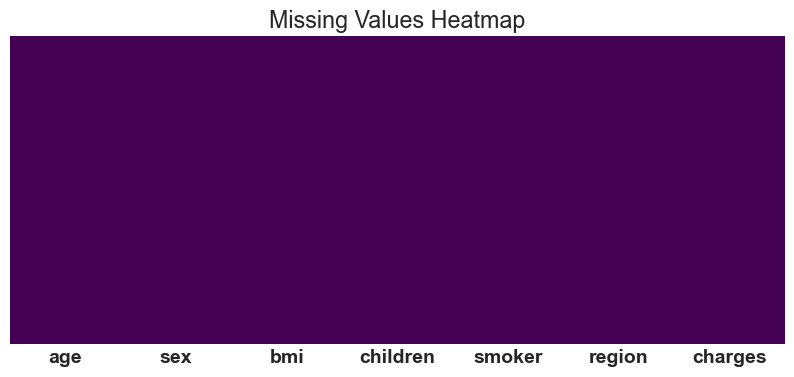

In [28]:
# Generate a matrix of true/false where True indicates a missing value
missing_values = df.isnull()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

There are no missing values.

C:\Users\VelzM\AppData\Local\Temp\ipykernel_3592\1794198867.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


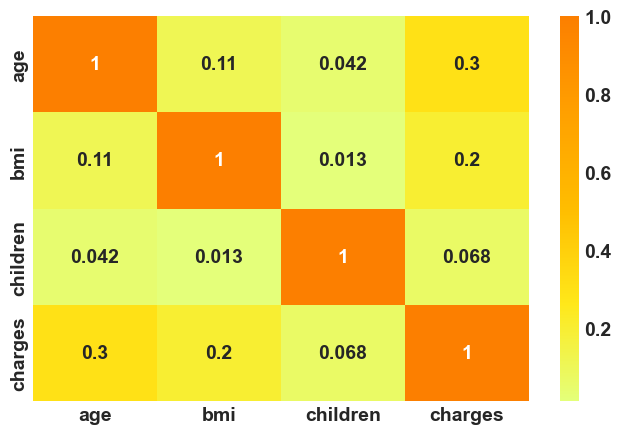

In [13]:
# Correlation plot.
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

There is little correlation among the variables.

C:\Users\VelzM\AppData\Local\Temp\ipykernel_3592\806743600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r',ax=ax)
C:\Users\VelzM\AppData\Local\Temp\ipykernel_3592\806743600.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=40,col

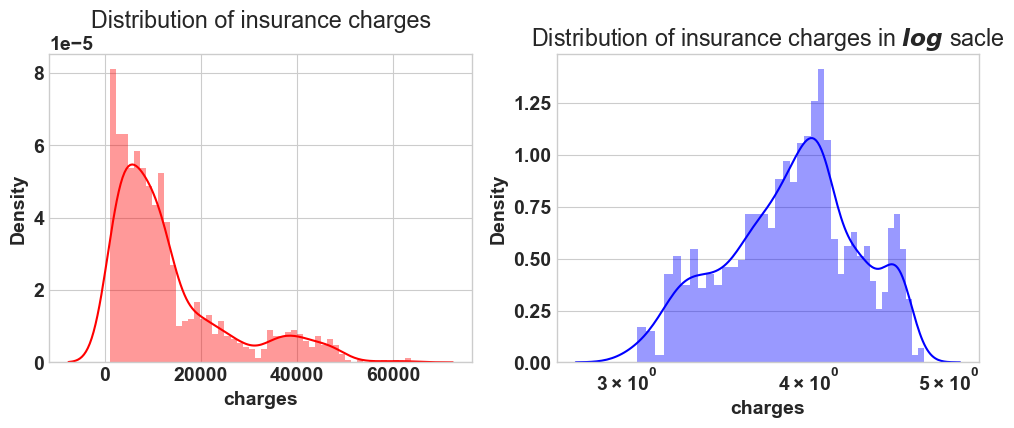

In [29]:
# Visualize the distribution of the charges.
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

The left plot is right skewed, the right plot tends to be normally distributed.<br>
Taking the natural logarithm (ln) of a dataset can be a useful transformation to achieve a more normal distribution.

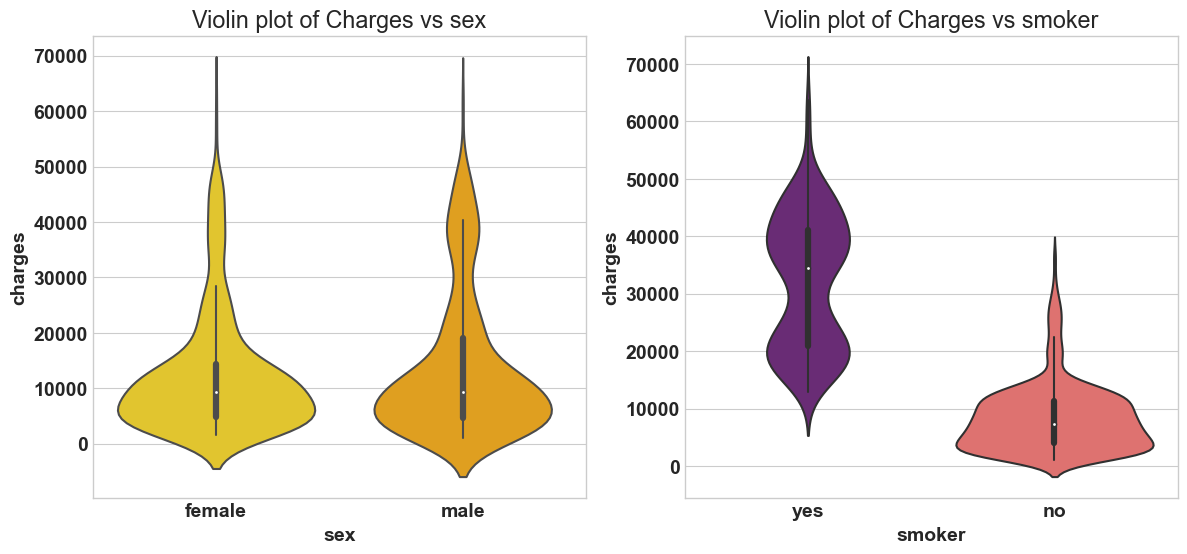

In [31]:
# Visualize the distribution for the sex and smoker versus the charges.
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

The left plot the insurance charge for male and female is approximatley in same range.<br>
In the right plot the insurance charge for smokers and non smokers show different ranges and densities.

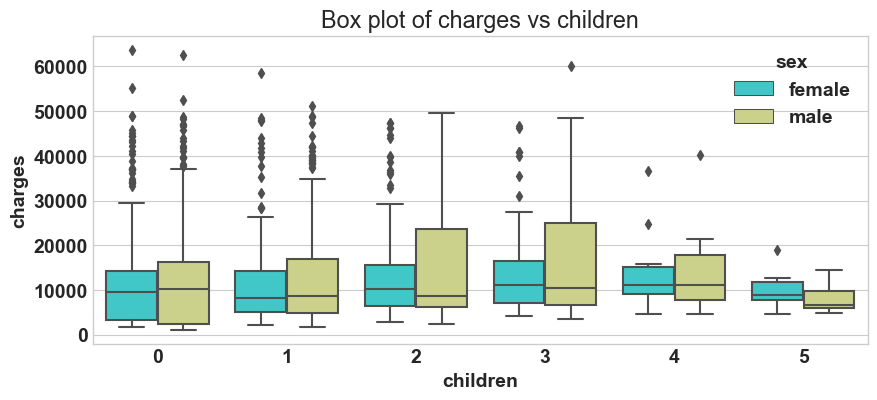

In [32]:
# Visualize the distribution for the number of children versus the charges.
plt.figure(figsize=(10,4))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [33]:
# Show the statistics for charges considering the number of children.
df.groupby('children').agg(['mean','min','max'])['charges']

C:\Users\VelzM\AppData\Local\Temp\ipykernel_3592\1453342284.py:2: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(['mean','min','max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


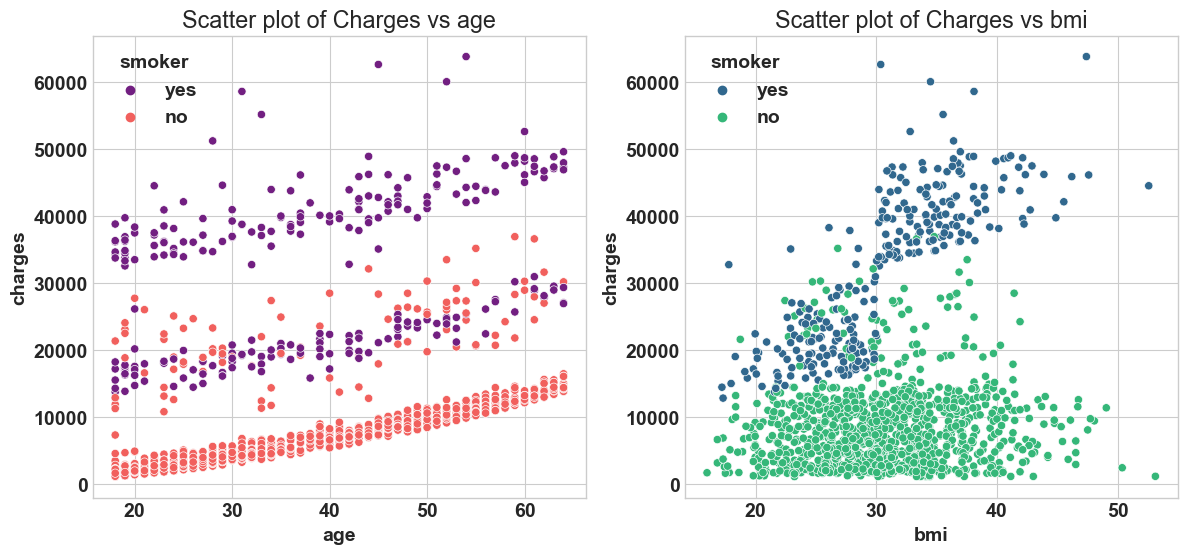

In [34]:
# Visualize the individual data points for age and bmi versus the charges distuinguisting smoker.
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

## ML Data Engineering

In [59]:
# The sex, smoker, children and region variables are categorical data and need to be encoded.
categorical_columns = ['sex', 'smoker', 'children', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [60]:
df_encode.head()

,age,bmi,charges,OHE_male,OHE_yes,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,1,0,0,0,0,0,0,0,1
1,18,33.770,1725.55230,1,0,1,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,0,1,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [63]:
# Transform the charges into a normal shape by using the Box Cox transformation.
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)
df_encode['charges'] = np.log(df_encode['charges'])

## ML Model Engineering

In [66]:
# Train, test and split.
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [67]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [68]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [69]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_yes,1.550481,1.550481
5,theta_5,OHE_1,0.149457,0.149457
6,theta_6,OHE_2,0.272919,0.272919
7,theta_7,OHE_3,0.244095,0.244095
8,theta_8,OHE_4,0.523339,0.523339
9,theta_9,OHE_5,0.466030,0.466030


## ML Model Evaluation

## References

https://chat.openai.com/<br>
https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/notebook<br>